In [1]:
from faker import Faker
import pandas as pd
import random
import matplotlib.pyplot as plt
import datetime

In [2]:
df = pd.read_csv('../datasets/nepali_first_name_gender.csv')

In [3]:
filename = '../datasets/lastnames.txt'
with open(filename) as f:
    content = f.readlines()
content = [x.strip()[:-1] for x in content] 

In [4]:
last_names = [x.capitalize() for x in content] 

In [5]:
first_name_male = [x.capitalize() for x in list(df[df.gender=='M'].first_name)] 
first_name_female = [x.capitalize() for x in list(df[df.gender=='F'].first_name)]

In [6]:
[random.choice(first_name_male) + " " + random.choice(last_names) for x in range(10)]

['Finjo Karky',
 'Satish Bhasinka',
 'Mitra mani Sakha',
 'Ranjan Poppe',
 'Asisnero Karnajeet',
 'Swaraj Kapar',
 'Gagan Neuralla',
 'Nirmal Rijwan',
 'Jenis Uraon',
 'Pashupati Rahmi']

In [7]:
total_customer = 30000
male_percent = 58

male = {'name': [random.choice(first_name_male) + " " + random.choice(last_names) for x in range(int(total_customer*male_percent/100))]}
female = {'name': [random.choice(first_name_female) + " " + random.choice(last_names) for x in range(int(total_customer*(100-male_percent)/100))]}

In [8]:
df_male = pd.DataFrame(data=male)
df_male['gender'] = 'Male'
df_female = pd.DataFrame(data=female)
df_female['gender'] = 'Female'

In [9]:
df = df_male.append(df_female)

In [10]:
df.loc[df.sample(frac=.04).index,
    'gender'
] = 'Other'

df.loc[df.sample(frac=.02).index,
    'gender'
] = 'Prefer not to say'

In [11]:
df.gender.value_counts()

Male                 15673
Female               11156
Other                 2070
Prefer not to say     1101
Name: gender, dtype: int64

In [12]:
def email_gen(name):
    name = name.lower()
    return (name.split(' ')[0]+'.'+name.split(' ')[1]+'@fakeemail.com')

In [13]:
df['email'] = df.name.apply(email_gen)

In [14]:
df

,name,gender,email
0,Sarbodaya Deuja,Male,sarbodaya.deuja@fakeemail.com
1,Swaraj Ahmed,Male,swaraj.ahmed@fakeemail.com
2,Nirmal Padhyay,Male,nirmal.padhyay@fakeemail.com
3,Yubaraj Jhangaju,Male,yubaraj.jhangaju@fakeemail.com
4,Sushant Gana,Male,sushant.gana@fakeemail.com
...,...,...,...
12595,Manu Sunam,Female,manu.sunam@fakeemail.com
12596,Junu Kayashta,Other,junu.kayashta@fakeemail.com
12597,Shubhu Adhakari,Female,shubhu.adhakari@fakeemail.com
12598,Lune Ranphaili,Female,lune.ranphaili@fakeemail.com


In [15]:
df['phone'] = [random.randint(9841000000, 9842000000) for x in range(df.shape[0])]

In [16]:
df

,name,gender,email,phone
0,Sarbodaya Deuja,Male,sarbodaya.deuja@fakeemail.com,9841071250
1,Swaraj Ahmed,Male,swaraj.ahmed@fakeemail.com,9841904723
2,Nirmal Padhyay,Male,nirmal.padhyay@fakeemail.com,9841112869
3,Yubaraj Jhangaju,Male,yubaraj.jhangaju@fakeemail.com,9841771272
4,Sushant Gana,Male,sushant.gana@fakeemail.com,9841252082
...,...,...,...,...
12595,Manu Sunam,Female,manu.sunam@fakeemail.com,9841001522
12596,Junu Kayashta,Other,junu.kayashta@fakeemail.com,9841948765
12597,Shubhu Adhakari,Female,shubhu.adhakari@fakeemail.com,9841527637
12598,Lune Ranphaili,Female,lune.ranphaili@fakeemail.com,9841575865


In [17]:
df['channel'] = 'Word of Mouth'

In [18]:
df.loc[df.sample(frac=.5).index,
    'channel'
] = 'Facebook/Ads'

df.loc[df.sample(frac=.2).index,
    'channel'
] = 'Google Search'

df.loc[df.sample(frac=.1).index,
    'channel'
] = 'Other'

In [19]:
df

,name,gender,email,phone,channel
0,Sarbodaya Deuja,Male,sarbodaya.deuja@fakeemail.com,9841071250,Word of Mouth
1,Swaraj Ahmed,Male,swaraj.ahmed@fakeemail.com,9841904723,Other
2,Nirmal Padhyay,Male,nirmal.padhyay@fakeemail.com,9841112869,Facebook/Ads
3,Yubaraj Jhangaju,Male,yubaraj.jhangaju@fakeemail.com,9841771272,Facebook/Ads
4,Sushant Gana,Male,sushant.gana@fakeemail.com,9841252082,Facebook/Ads
...,...,...,...,...,...
12595,Manu Sunam,Female,manu.sunam@fakeemail.com,9841001522,Other
12596,Junu Kayashta,Other,junu.kayashta@fakeemail.com,9841948765,Google Search
12597,Shubhu Adhakari,Female,shubhu.adhakari@fakeemail.com,9841527637,Facebook/Ads
12598,Lune Ranphaili,Female,lune.ranphaili@fakeemail.com,9841575865,Google Search


In [20]:
df.channel.value_counts()

Facebook/Ads     11375
Google Search     8181
Other             5304
Word of Mouth     5140
Name: channel, dtype: int64

In [21]:
df['first_contact'] = 'app'

In [22]:
df.loc[df.sample(frac=.676).index,
    'first_contact'
] = 'browser'

In [23]:
df

,name,gender,email,phone,channel,first_contact
0,Sarbodaya Deuja,Male,sarbodaya.deuja@fakeemail.com,9841071250,Word of Mouth,browser
1,Swaraj Ahmed,Male,swaraj.ahmed@fakeemail.com,9841904723,Other,browser
2,Nirmal Padhyay,Male,nirmal.padhyay@fakeemail.com,9841112869,Facebook/Ads,browser
3,Yubaraj Jhangaju,Male,yubaraj.jhangaju@fakeemail.com,9841771272,Facebook/Ads,browser
4,Sushant Gana,Male,sushant.gana@fakeemail.com,9841252082,Facebook/Ads,browser
...,...,...,...,...,...,...
12595,Manu Sunam,Female,manu.sunam@fakeemail.com,9841001522,Other,browser
12596,Junu Kayashta,Other,junu.kayashta@fakeemail.com,9841948765,Google Search,browser
12597,Shubhu Adhakari,Female,shubhu.adhakari@fakeemail.com,9841527637,Facebook/Ads,app
12598,Lune Ranphaili,Female,lune.ranphaili@fakeemail.com,9841575865,Google Search,browser


In [24]:
df['first_contact'].value_counts()

browser    25801
app         4199
Name: first_contact, dtype: int64

In [25]:
df = df.sample(frac=1)

In [26]:
df

,name,gender,email,phone,channel,first_contact
2419,Ameesh Banjankar,Male,ameesh.banjankar@fakeemail.com,9841220347,Facebook/Ads,app
7030,Nirmal Bhujal,Male,nirmal.bhujal@fakeemail.com,9841599874,Other,browser
2298,Liv Punjali,Female,liv.punjali@fakeemail.com,9841715323,Facebook/Ads,browser
2571,Finjo Ahmed,Male,finjo.ahmed@fakeemail.com,9841246361,Facebook/Ads,browser
8422,Sarita Vaidik,Female,sarita.vaidik@fakeemail.com,9841615561,Facebook/Ads,browser
...,...,...,...,...,...,...
7392,Sarbodaya Imam,Male,sarbodaya.imam@fakeemail.com,9841895976,Facebook/Ads,browser
10146,Prati Luhar,Prefer not to say,prati.luhar@fakeemail.com,9841023030,Google Search,app
6473,Ameesh Bhatrai,Male,ameesh.bhatrai@fakeemail.com,9841101156,Google Search,browser
17001,Aashish Kewat,Other,aashish.kewat@fakeemail.com,9841170900,Word of Mouth,browser


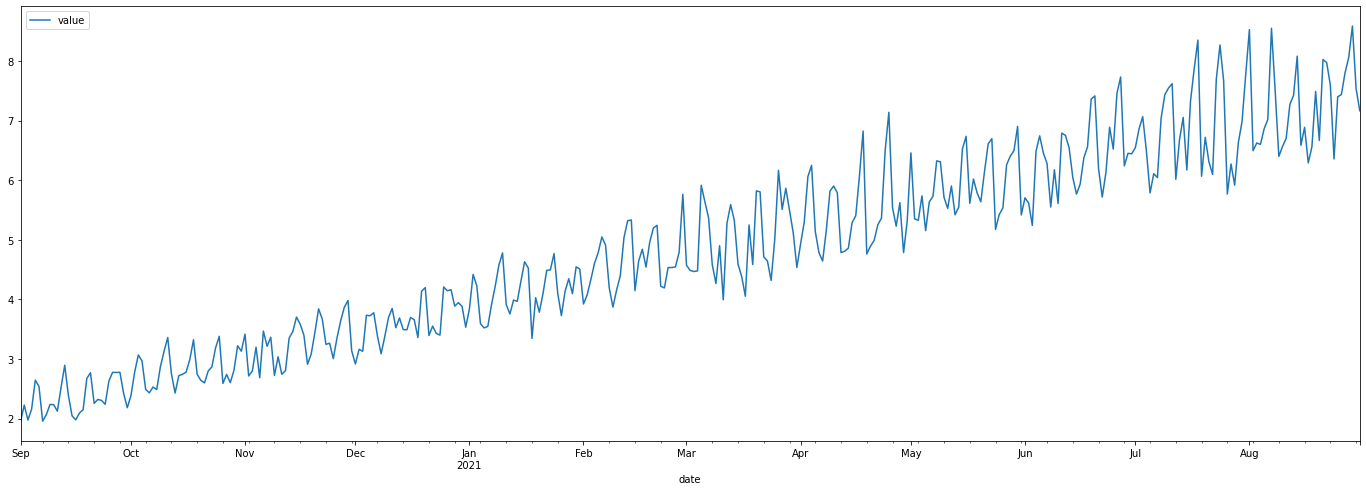

In [27]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, WeekdayFactor
import pandas as pd

start="09-01-2020"
end="08-31-2021"


# setting up a linear tren
lt = LinearTrend(coef=5.0, offset=1., col_name="my_linear_trend")

weekday_factor = WeekdayFactor(
    col_name="weekend_boost_factor",
    factor_values={4: 1.1, 5: 1.2, 6: 1.2}  # Here we assign a factor of 1.1 to Friday, and 1.2 to Sat/Sun 
)

# weekday_factor.plot(start_date=start, end_date=end)

g = Generator(factors={lt, weekday_factor}, features=None, date_range=pd.date_range(start=start, end=end))
g.generate()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.06)
g.update_factor(wn)
g.generate()
g.plot()

In [28]:
data = g.generate()

In [29]:
data['rows'] = (10*data.value).astype(int)

In [30]:
data.rows.sum()

17434

In [31]:
data

,date,base_amount,white_noise,my_linear_trend,weekend_boost_factor,total_factor,value,rows
0,2020-09-01,1.0,1.176366,2.000000,1.0,2.352733,2.352733,23
1,2020-09-02,1.0,0.978263,2.013699,1.0,1.969927,1.969927,19
2,2020-09-03,1.0,0.976036,2.027397,1.0,1.978812,1.978812,19
3,2020-09-04,1.0,1.050729,2.041096,1.1,2.359104,2.359104,23
4,2020-09-05,1.0,0.940855,2.054795,1.2,2.319917,2.319917,23
...,...,...,...,...,...,...,...,...
360,2021-08-27,1.0,1.067613,6.931507,1.1,8.140182,8.140182,81
361,2021-08-28,1.0,1.004303,6.945205,1.2,8.370112,8.370112,83
362,2021-08-29,1.0,0.941737,6.958904,1.2,7.864149,7.864149,78
363,2021-08-30,1.0,1.118078,6.972603,1.0,7.795910,7.795910,77


In [32]:
def nepali_holiday(row):
    date = datetime.datetime.strptime(str(row.date), "%Y-%m-%d %H:%M:%S")
    num = row.rows
    if date>datetime.datetime(2020, 10, 16) and date<datetime.datetime(2020, 10, 25):
        num = int (num*1.2)
    if date>datetime.datetime(2020, 12, 24) and date<datetime.datetime(2021, 1, 2):
        num = int (num*1.4)
    if date>datetime.datetime(2021, 1, 4) and date<datetime.datetime(2021, 1, 7):
        num = num - num
    if date>datetime.datetime(2021, 2, 13) and date<datetime.datetime(2021, 2, 15):
        num = int (num*1.4)
    if date>datetime.datetime(2021, 7, 1):
        num = int(num * 2)
    return num

In [33]:
data['rows'] = data.apply(nepali_holiday, axis=1)

In [34]:
# ["2020-09-01"]*100 + ["2020-09-02"] * 200
from datetime import datetime as dt
import datetime

def create_list(row):
    return [str(row.date)]*row.rows

In [35]:
final_dates = (data.apply(create_list, axis=1).sum())

In [36]:
clients = df.head(len(final_dates))
clients.reset_index(inplace = True, drop=True)

In [37]:
clients['created_at'] = final_dates

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_87768/801896566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['created_at'] = final_dates


In [38]:
clients

,name,gender,email,phone,channel,first_contact,created_at
0,Ameesh Banjankar,Male,ameesh.banjankar@fakeemail.com,9841220347,Facebook/Ads,app,2020-09-01 00:00:00
1,Nirmal Bhujal,Male,nirmal.bhujal@fakeemail.com,9841599874,Other,browser,2020-09-01 00:00:00
2,Liv Punjali,Female,liv.punjali@fakeemail.com,9841715323,Facebook/Ads,browser,2020-09-01 00:00:00
3,Finjo Ahmed,Male,finjo.ahmed@fakeemail.com,9841246361,Facebook/Ads,browser,2020-09-01 00:00:00
4,Sarita Vaidik,Female,sarita.vaidik@fakeemail.com,9841615561,Facebook/Ads,browser,2020-09-01 00:00:00
...,...,...,...,...,...,...,...
21830,Junu Harlalka,Female,junu.harlalka@fakeemail.com,9841313124,Facebook/Ads,browser,2021-08-31 00:00:00
21831,Sabal Weju,Male,sabal.weju@fakeemail.com,9841342282,Facebook/Ads,browser,2021-08-31 00:00:00
21832,Malkit Dilshad,Male,malkit.dilshad@fakeemail.com,9841693249,Word of Mouth,browser,2021-08-31 00:00:00
21833,Binod Sinjali,Male,binod.sinjali@fakeemail.com,9841004281,Google Search,browser,2021-08-31 00:00:00


In [39]:
clients.gender.value_counts()

Male                 11310
Female                8240
Other                 1497
Prefer not to say      788
Name: gender, dtype: int64

In [40]:
clients.channel.value_counts()

Facebook/Ads     8291
Google Search    5925
Other            3872
Word of Mouth    3747
Name: channel, dtype: int64

In [41]:
clients['first_contact'].value_counts()

browser    18760
app         3075
Name: first_contact, dtype: int64

In [42]:
def random_times(input_time):
    random_hour = random.uniform(0, 23)
    return dt.strptime(input_time, "%Y-%m-%d %H:%M:%S") + datetime.timedelta(hours=random_hour)

In [43]:
clients['created_at'] = clients['created_at'].apply(random_times)

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_87768/1294208807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['created_at'] = clients['created_at'].apply(random_times)


In [44]:
clients.sort_values('created_at').reset_index(drop=True, inplace=True)

In [45]:
clients['client_id'] = clients.index + 100000000

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_87768/781864625.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['client_id'] = clients.index + 100000000


In [46]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id
0,Ameesh Banjankar,Male,ameesh.banjankar@fakeemail.com,9841220347,Facebook/Ads,app,2020-09-01 15:57:01.516618,100000000
1,Nirmal Bhujal,Male,nirmal.bhujal@fakeemail.com,9841599874,Other,browser,2020-09-01 16:56:57.686477,100000001
2,Liv Punjali,Female,liv.punjali@fakeemail.com,9841715323,Facebook/Ads,browser,2020-09-01 19:01:02.696298,100000002
3,Finjo Ahmed,Male,finjo.ahmed@fakeemail.com,9841246361,Facebook/Ads,browser,2020-09-01 00:08:03.341002,100000003
4,Sarita Vaidik,Female,sarita.vaidik@fakeemail.com,9841615561,Facebook/Ads,browser,2020-09-01 02:13:34.321244,100000004
...,...,...,...,...,...,...,...,...
21830,Junu Harlalka,Female,junu.harlalka@fakeemail.com,9841313124,Facebook/Ads,browser,2021-08-31 11:22:02.109686,100021830
21831,Sabal Weju,Male,sabal.weju@fakeemail.com,9841342282,Facebook/Ads,browser,2021-08-31 02:10:36.479841,100021831
21832,Malkit Dilshad,Male,malkit.dilshad@fakeemail.com,9841693249,Word of Mouth,browser,2021-08-31 09:31:36.071492,100021832
21833,Binod Sinjali,Male,binod.sinjali@fakeemail.com,9841004281,Google Search,browser,2021-08-31 08:26:44.789887,100021833


In [47]:
def date_gen(start, end):
    start_date = datetime.date(start, 1, 1)
    end_date = datetime.date(end, 12, 31)
    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + datetime.timedelta(days=random_number_of_days)
    return str(random_date)

In [48]:
dob = [date_gen(1975, 1990) for x in range(clients.shape[0]//5)] + \
[date_gen(1991, 1995) for x in range(clients.shape[0]//5)] + \
[date_gen(1996, 2000) for x in range(clients.shape[0]//2)] + \
[date_gen(2001, 2005) for x in range(clients.shape[0]//2)] + \
[date_gen(2006, 2008) for x in range(clients.shape[0]//5)]

In [49]:
random.shuffle(dob)

In [50]:
clients['dob'] = dob[:clients.shape[0]]

/var/folders/zy/d9m3l1wn4pjf2b_1ny6w5ftc0000gp/T/ipykernel_87768/1825158366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clients['dob'] = dob[:clients.shape[0]]


In [51]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Ameesh Banjankar,Male,ameesh.banjankar@fakeemail.com,9841220347,Facebook/Ads,app,2020-09-01 15:57:01.516618,100000000,2007-07-28
1,Nirmal Bhujal,Male,nirmal.bhujal@fakeemail.com,9841599874,Other,browser,2020-09-01 16:56:57.686477,100000001,1980-03-04
2,Liv Punjali,Female,liv.punjali@fakeemail.com,9841715323,Facebook/Ads,browser,2020-09-01 19:01:02.696298,100000002,1999-04-23
3,Finjo Ahmed,Male,finjo.ahmed@fakeemail.com,9841246361,Facebook/Ads,browser,2020-09-01 00:08:03.341002,100000003,2000-07-21
4,Sarita Vaidik,Female,sarita.vaidik@fakeemail.com,9841615561,Facebook/Ads,browser,2020-09-01 02:13:34.321244,100000004,2005-04-09
...,...,...,...,...,...,...,...,...,...
21830,Junu Harlalka,Female,junu.harlalka@fakeemail.com,9841313124,Facebook/Ads,browser,2021-08-31 11:22:02.109686,100021830,2002-01-10
21831,Sabal Weju,Male,sabal.weju@fakeemail.com,9841342282,Facebook/Ads,browser,2021-08-31 02:10:36.479841,100021831,2004-09-28
21832,Malkit Dilshad,Male,malkit.dilshad@fakeemail.com,9841693249,Word of Mouth,browser,2021-08-31 09:31:36.071492,100021832,2002-04-24
21833,Binod Sinjali,Male,binod.sinjali@fakeemail.com,9841004281,Google Search,browser,2021-08-31 08:26:44.789887,100021833,1999-04-23


In [52]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Ameesh Banjankar,Male,ameesh.banjankar@fakeemail.com,9841220347,Facebook/Ads,app,2020-09-01 15:57:01.516618,100000000,2007-07-28
1,Nirmal Bhujal,Male,nirmal.bhujal@fakeemail.com,9841599874,Other,browser,2020-09-01 16:56:57.686477,100000001,1980-03-04
2,Liv Punjali,Female,liv.punjali@fakeemail.com,9841715323,Facebook/Ads,browser,2020-09-01 19:01:02.696298,100000002,1999-04-23
3,Finjo Ahmed,Male,finjo.ahmed@fakeemail.com,9841246361,Facebook/Ads,browser,2020-09-01 00:08:03.341002,100000003,2000-07-21
4,Sarita Vaidik,Female,sarita.vaidik@fakeemail.com,9841615561,Facebook/Ads,browser,2020-09-01 02:13:34.321244,100000004,2005-04-09
...,...,...,...,...,...,...,...,...,...
21830,Junu Harlalka,Female,junu.harlalka@fakeemail.com,9841313124,Facebook/Ads,browser,2021-08-31 11:22:02.109686,100021830,2002-01-10
21831,Sabal Weju,Male,sabal.weju@fakeemail.com,9841342282,Facebook/Ads,browser,2021-08-31 02:10:36.479841,100021831,2004-09-28
21832,Malkit Dilshad,Male,malkit.dilshad@fakeemail.com,9841693249,Word of Mouth,browser,2021-08-31 09:31:36.071492,100021832,2002-04-24
21833,Binod Sinjali,Male,binod.sinjali@fakeemail.com,9841004281,Google Search,browser,2021-08-31 08:26:44.789887,100021833,1999-04-23


In [53]:
location = pd.read_csv("../datasets/location.csv")

In [54]:
location = location[['lat', 'lon', 'name']]

In [55]:
location_list =  [location.sample().values.tolist() for x in range(clients.shape[0])]

In [56]:
location_df = pd.DataFrame(location_list)

In [57]:
location_df

,0
0,"[27.7082, 85.3332, Pashupati Rd 866]"
1,"[27.683, 85.3067, Millennium House]"
2,"[27.6547, 85.3191, Tareba Restaurant and Sekuw..."
3,"[27.7069, 85.3225, Hattisar Rd]"
4,"[27.6745, 85.3087, Pulchowk - Dhobighat Rd]"
...,...
21830,"[27.7285, 85.3464, Sukedhara Communication]"
21831,"[27.6884, 85.3264, Basanta Marg]"
21832,"[27.7082, 85.334, Sahid Marg]"
21833,"[27.6679, 85.3217, Lagankhel Satdobato Rd]"


In [58]:
location_df[['lat','lon', 'location_name']] = pd.DataFrame(location_df[0].tolist(), index= location_df.index)

In [59]:
location_df[['lat', 'lon', 'location_name']]

,lat,lon,location_name
0,27.7082,85.3332,Pashupati Rd 866
1,27.6830,85.3067,Millennium House
2,27.6547,85.3191,Tareba Restaurant and Sekuwa Ghar
3,27.7069,85.3225,Hattisar Rd
4,27.6745,85.3087,Pulchowk - Dhobighat Rd
...,...,...,...
21830,27.7285,85.3464,Sukedhara Communication
21831,27.6884,85.3264,Basanta Marg
21832,27.7082,85.3340,Sahid Marg
21833,27.6679,85.3217,Lagankhel Satdobato Rd


In [60]:
clients

,name,gender,email,phone,channel,first_contact,created_at,client_id,dob
0,Ameesh Banjankar,Male,ameesh.banjankar@fakeemail.com,9841220347,Facebook/Ads,app,2020-09-01 15:57:01.516618,100000000,2007-07-28
1,Nirmal Bhujal,Male,nirmal.bhujal@fakeemail.com,9841599874,Other,browser,2020-09-01 16:56:57.686477,100000001,1980-03-04
2,Liv Punjali,Female,liv.punjali@fakeemail.com,9841715323,Facebook/Ads,browser,2020-09-01 19:01:02.696298,100000002,1999-04-23
3,Finjo Ahmed,Male,finjo.ahmed@fakeemail.com,9841246361,Facebook/Ads,browser,2020-09-01 00:08:03.341002,100000003,2000-07-21
4,Sarita Vaidik,Female,sarita.vaidik@fakeemail.com,9841615561,Facebook/Ads,browser,2020-09-01 02:13:34.321244,100000004,2005-04-09
...,...,...,...,...,...,...,...,...,...
21830,Junu Harlalka,Female,junu.harlalka@fakeemail.com,9841313124,Facebook/Ads,browser,2021-08-31 11:22:02.109686,100021830,2002-01-10
21831,Sabal Weju,Male,sabal.weju@fakeemail.com,9841342282,Facebook/Ads,browser,2021-08-31 02:10:36.479841,100021831,2004-09-28
21832,Malkit Dilshad,Male,malkit.dilshad@fakeemail.com,9841693249,Word of Mouth,browser,2021-08-31 09:31:36.071492,100021832,2002-04-24
21833,Binod Sinjali,Male,binod.sinjali@fakeemail.com,9841004281,Google Search,browser,2021-08-31 08:26:44.789887,100021833,1999-04-23


In [61]:
clients = pd.concat([clients, location_df[['lat', 'lon', 'location_name']]], axis=1)

In [62]:
list(clients)

['name',
 'gender',
 'email',
 'phone',
 'channel',
 'first_contact',
 'created_at',
 'client_id',
 'dob',
 'lat',
 'lon',
 'location_name']

In [63]:
clients[
['client_id',
 'name',
 'gender',
 'dob',
 'email',
 'phone',
 'channel',
 'first_contact',
  'lat',
 'lon',
 'location_name',
 'created_at']
].to_csv('../datasets/clients.csv', index=False)